    CustType        Drink  Age  Sales Reward
0      Adult        Latte   44   4.50      N
1      Child        Mocha   12   6.25      N
2   Teenager  Frappachino   19   4.75      N
3   Teenager          Tea   18   3.75      N
4      Child          Tea   13   4.25      N
5      Adult        Mocha   44   6.00      Y
6      Adult        Latte   37   5.00      N
7      Adult        Latte   61   5.25      Y
8   Teenager        Mocha   17   4.50      N
9      Adult          Tea   42   4.00      N
10     Child  Frappachino    9   4.50      N
11     Child  Frappachino   11   3.75      N
12  Teenager          Tea   16   4.00      N
13     Adult        Mocha   50   4.50      Y
14     Adult          Tea   48   5.00      N
15     Adult        Latte   39   4.25      N
16  Teenager  Frappachino   19   4.75      Y
17  Teenager          Tea   18   3.00      Y
18  Teenager        Mocha   16   5.00      N
19     Child        Latte   12   4.25      N
Histogram of Age


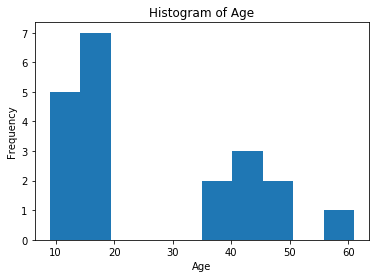

Histogram of Sales


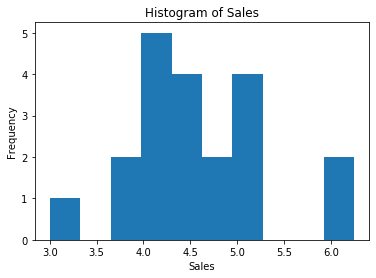

Histogram of Sales cut into 3 bins


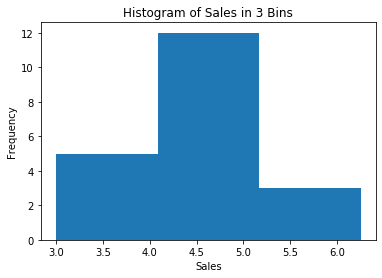

Histogram of Sales cut into 4 bins with some helpful information


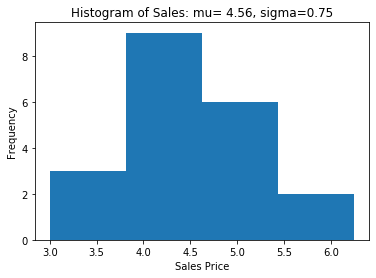

Probability density function of Sales, 10 bins, doing some color


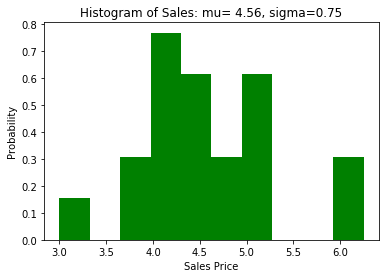

Adult       8
Teenager    7
Child       5
Name: CustType, dtype: int64
Customer Type Counts, vertical bar graph


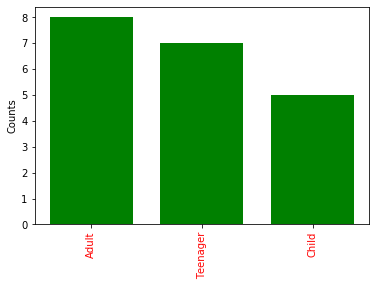

Adult       8
Teenager    7
Child       5
Name: CustType, dtype: int64
Customer Type Counts, horizontal bar graph


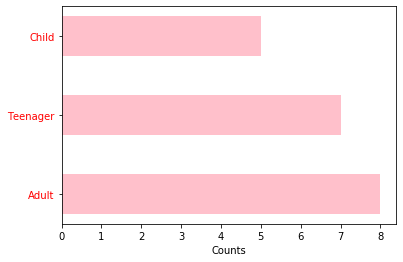

The data from Region3.csv
   North  South  East  West
0     63     83   110    52
1     68     86   115    77
2     70     92   116    83
3     74     98   115    91
4     69    101   112    95
5     81    115   120    94
6     80    131   123   101
7     84    167   130   103
The percentage change for all regions
      North     South      East      West
0       NaN       NaN       NaN       NaN
1  0.079365  0.036145  0.045455  0.480769
2  0.029412  0.069767  0.008696  0.077922
3  0.057143  0.065217 -0.008621  0.096386
4 -0.067568  0.030612 -0.026087  0.043956
5  0.173913  0.138614  0.071429 -0.010526
6 -0.012346  0.139130  0.025000  0.074468
7  0.050000  0.274809  0.056911  0.019802
Scatter plot showing 2 variables, North and South


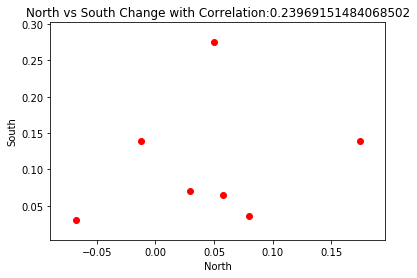

Scatter plot showing 2 sets of 2 variables


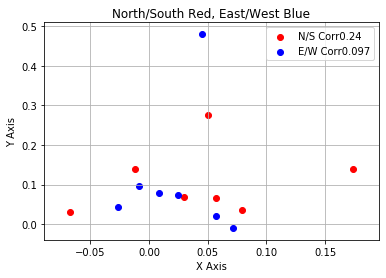

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118659550>,
      dtype=object)

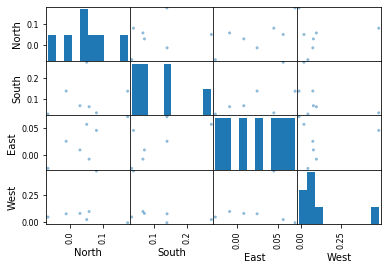

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

CoffeeSales = pd.read_csv('Coffee2.csv')
print (CoffeeSales)

print("Histogram of Age")
plt.hist(CoffeeSales.Age)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print("Histogram of Sales")
plt.hist(CoffeeSales.Sales)
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

#Meaning - take lowest, highest, and split that range into 3, 
print("Histogram of Sales cut into 3 bins")
plt.hist(CoffeeSales.Sales,3)
plt.title('Histogram of Sales in 3 Bins')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

print("Histogram of Sales cut into 4 bins with some helpful information")
plt.hist(CoffeeSales.Sales, 4)
mn = str(round(CoffeeSales.Sales.mean(),2))
sd = str(round(CoffeeSales.Sales.std(),2))
plt.title(f'Histogram of Sales: mu= {mn}, sigma={sd}')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.savefig('SalesHist.jpeg')
plt.show()

# Instead of showing frequency at each level, you can show probability density function. It is not hist of count, now a hist of prob.
# You can also change colors
print("Probability density function of Sales, 10 bins, doing some color")
plt.hist(CoffeeSales.Sales, 10, color='green', density=1)
mn = str(round(CoffeeSales.Sales.mean(),2))
sd = str(round(CoffeeSales.Sales.std(),2))
plt.title(f'Histogram of Sales: mu= {mn}, sigma={sd}')
plt.xlabel('Sales Price')
plt.ylabel('Probability')
plt.savefig('SalesHist2.png')
plt.show()

# Bar chart... vertical

CustTypeCounts = CoffeeSales.CustType.value_counts()
print(CustTypeCounts)
print("Customer Type Counts, vertical bar graph")
y = list(CustTypeCounts)   # list of values for bar heights
n=len(y)                   # number of bars
x=np.arange(n)             # bar positions; as n=3, x =[0, 1, 2]
plt.bar(x,y, width=.75,color='green')
plt.ylabel('Counts')
plt.xticks(x,CustTypeCounts.index,color='red', rotation='vertical')
plt.show()

# The Bar chart... horizontal
CustTypeCounts = CoffeeSales.CustType.value_counts()
print(CustTypeCounts)
print("Customer Type Counts, horizontal bar graph")
y = list(CustTypeCounts)   # list of values for bar heights
n=len(y)                   # number of bars
x=np.arange(n)             # bar positions; as n=3, x =[0, 1, 2]
plt.barh(x,y, height=.50,color='pink')
plt.xlabel('Counts')
plt.yticks(x,CustTypeCounts.index,color='red', rotation='horizontal')
plt.show()

DF = pd.read_csv('Region3.csv')
print ("The data from Region3.csv")
print (DF)
pchange = DF.pct_change()    # % change within columns, first row will be NaN
print("The percentage change for all regions")
print (pchange)

print ("Scatter plot showing 2 variables, North and South")

plt.scatter(pchange.North,pchange.South,color='red')
plt.title(f'North vs South Change with Correlation:{pchange.North.corr(pchange.South)}')
plt.xlabel('North')
plt.ylabel('South')
plt.show()

print ("Scatter plot showing 2 sets of 2 variables")
Corr1 = round(pchange.North.corr(pchange.South),3)
Corr2 = round(pchange.East.corr(pchange.West),3)

plt.scatter(pchange.North,pchange.South,color='red',label="N/S Corr" + str(Corr1))
plt.scatter(pchange.East,pchange.West, color='blue',label="E/W Corr" + str(Corr2))
plt.title("North/South Red, East/West Blue")
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.grid(True)
plt.show()

pd.plotting.scatter_matrix(pchange)
